In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

In [ ]:
train_txt = "../CombinedDataset/train.txt"
test_txt = "../CombinedDataset/test.txt"
names_file = "../classes.names"

# Loads the classes

In [ ]:
classes = []
with open(names_file, "r") as file:
    classes = file.read().split("\n")

In [ ]:
classes_dict = {x: classes[x] for x in range(len(classes))} # converts num to class
classes_dict

# Counts the number of images

In [ ]:
def count_images_darknet(txt):
    num_images = 0
    with open(txt, "r") as file:
        num_images = len(file.read().split("\n")[:-1])
    return num_images

In [106]:
num_train_images = count_images_darknet(train_txt)
num_test_images = count_images_darknet(test_txt)
num_total_images = num_train_images + num_test_images

print("Num Train:", num_train_images)
print("Num Test:", num_test_images)
print("Total:", num_total_images)

Num Train: 59501
Num Test: 6614
Total: 66115


# Function to count data, given list of classes

In [ ]:
def count_data_darknet(classes, txt):
    classes_dict = {x: classes[x] for x in range(len(classes))} # converts num to class
    class_count = {x: 0 for x in classes} # keeps track of count.

    img_paths = []
    with open(txt, "r") as file:
        img_paths = file.read().split("\n")[:-1]
    
    # iterates through every image path defined in the .txt file (darknet)
    for img_path in tqdm(img_paths, desc="Counting Images..."):
        img_labels_txt = img_path[:-3]+"txt" # replaces the .jpg at end with .txt
        
        # reads in the labels
        labels = []
        with open(img_labels_txt, "r") as file:
            labels = file.read().split("\n")
        
        # iterates through each label
        for label in labels:
            label_class = int(label.split(" ")[0]) # split by space, grab first item, to int
            class_count[classes_dict[label_class]] += 1

    return class_count

# Counting the classes

In [ ]:
train_count = count_data_darknet(classes, train_txt)

In [ ]:
test_count = count_data_darknet(classes, test_txt)

In [86]:
class_count = {x: train_count[x] + test_count[x] for x in classes}
class_count

{'stop': 1821,
 'stopAhead': 168,
 'yield': 236,
 'yieldAhead': 57,
 'pedestrianCrossing': 1085,
 'signalAhead': 925,
 'speedLimit': 1508,
 'turnRight': 92,
 'turnLeft': 32,
 'noRightTurn': 26,
 'noLeftTurn': 47,
 'doNotEnter': 23,
 'doNotPass': 9,
 'roundabout': 53,
 'intersection': 2,
 'rightLaneMustTurn': 77,
 'keepRight': 331,
 'keepLeft': 0,
 'curveRight': 50,
 'curveLeft': 37,
 'thruMergeRight': 7,
 'thruMergeLeft': 24,
 'slow': 34,
 'laneEnds': 210,
 'school': 133,
 'merge': 266,
 'trafficLight': 199305,
 'trafficLightgreen': 90829,
 'trafficLightyellow': 3927,
 'trafficLightred': 52723}

# Plots histograms

In [87]:
# traffic signs only
traffic_light_classes = ['trafficLight', 'trafficLightgreen', 'trafficLightyellow', 'trafficLightred']
signs_count = {x: class_count[x] for x in classes if x not in traffic_light_classes}

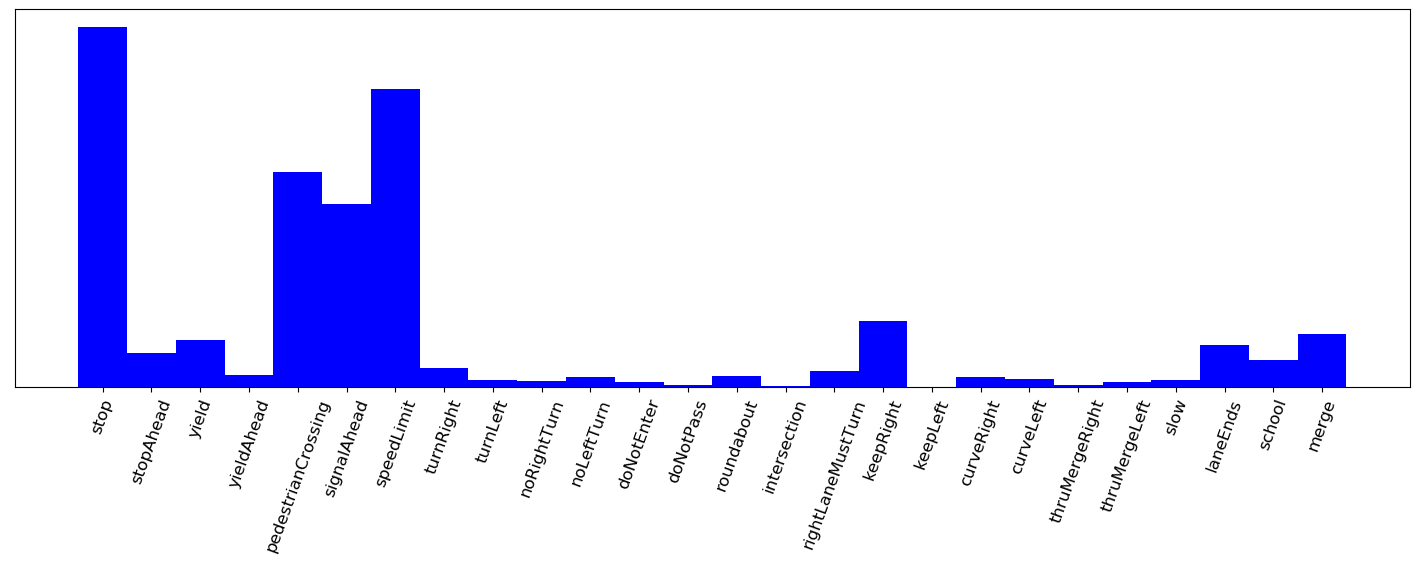

In [88]:
fig = plt.figure(figsize=(18, 5), dpi=100)
plt.bar(signs_count.keys(), signs_count.values(), 1, align="center", color="b")

fig.axes[0].get_yaxis().set_visible(False)
fig.axes[0].tick_params(labelrotation=70, labelsize=12)

In [95]:
new_names = ['lightframe', 'green', 'yellow', 'red']
lights_count_temp = {x: class_count[x] for x in classes if x in traffic_light_classes}
lights_count = {new_names[x] : lights_count_temp[key] for x, key in enumerate(lights_count_temp.keys())}

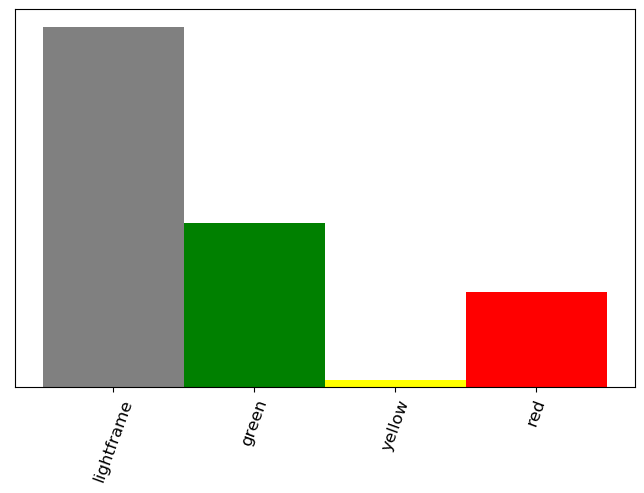

In [105]:
fig = plt.figure(figsize=(8, 5), dpi=100)
plt.bar(lights_count.keys(), lights_count.values(), 1, align="center", color=["gray", "green", "yellow", "red"])

fig.axes[0].get_yaxis().set_visible(False)
fig.axes[0].tick_params(labelrotation=70, labelsize=12)